In [3]:
import math

Instructions: https://work.caltech.edu/homework/hw1.pdf

Answers: http://work.caltech.edu/homework/hw1_sol.pdf

# The Learning Problem

## 1.

My answer: <font color='green'>d</font>

## 2.

My answer: <font color='green'>a</font>

# Bins and Marbles

## 3.
Enumerating all options:
Bags: A,B
Balls: W,B

Situation after the first pick is that there's now one B and one W ball left, and we don't know whether we picked the BW or the BB bag in the first place, so probability of picking either should be 50%.

My answer: <font color='red'>c</font>

This is wrong : )

So apparently the information of having picked a B ball influenced the information we have about whether we are in bags A or B.
Let's set it up like this:

A1 contains BB
A2 contains either BW or WB

Given we first-picked a B, what's the probability that we're looking at bag A1 or A2, respectively?
The total probabilty of picking a B in round one should be 3/4. Out of the three Bs we could've picked, only one is in bag A2 so the probabilities should be 2/3 that we picked A1, 1/3 that we picked A2.
So then the probabilty of picking another B would be 2/3.

New answer: <font color='green'>d</font>

Note: Bayes' Rule would've been helpful here for precise notation, which gives you the P(A|B) from P(B|A), P(A) and P(B).

Also see https://www.youtube.com/watch?v=HZGCoVF3YvM

Similar to the Monty-Hall-Problem. (Ziegenproblem)

# 4.
P(ν=0) = P("ten green marbles in a row") = 0.45^10

In [4]:
p_ten_green = math.pow(0.45,10)
f"{p_ten_green:.2e}"


'3.41e-04'

My answer: <font color='green'>b</font>

# 5.
N = 1000
P("at least one of the samples has ν=0") = 1 - P("none of the samples has ten green marbles") = 1 - P("all N samples have at least one red marble") = 1 - P("not ten green in one sample") ^ 1000

In [5]:
p_ten_green_in_1000 = 1 - math.pow(1-p_ten_green, 1000)
p_ten_green_in_1000

0.28863119784980995

My answer: <font color='green'>c</font>

# 6.
X not in D are: 101, 110, 111.

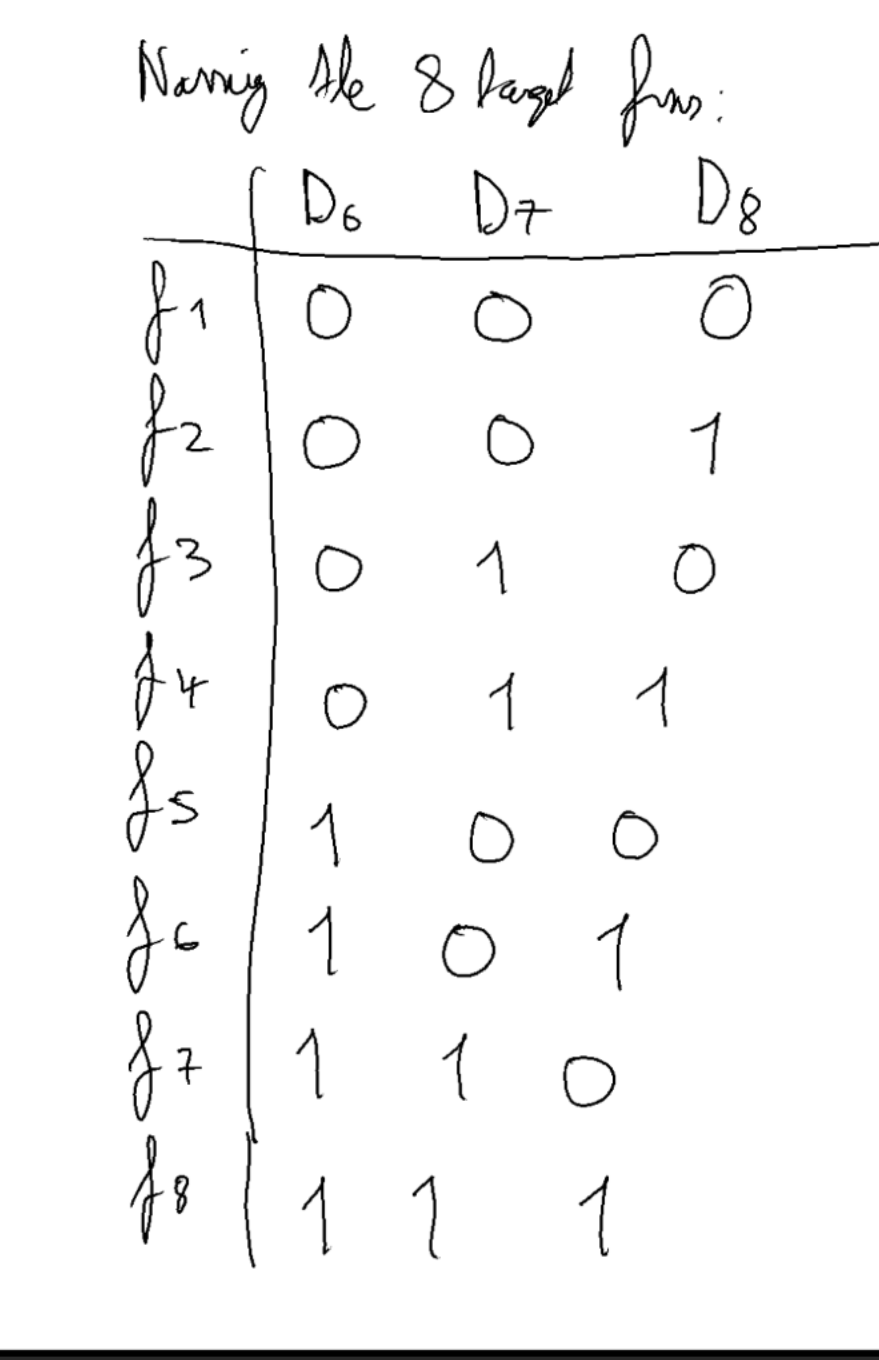


## [a] g returns 1 for all three points
3 Agreements: 1 (f8)

2 Agreements: 3 (f7, f6, f4)

1 Agreement: 3 (f2, f3, f5)


In [1]:
total_score_a = 3*1+2*3+1*3
total_score_a

12

## [b] g returns 0 for all three points
3 Agreements: 1 (f1)

2 Agreements: 3 (f2, f3, f5)

1 Agreement: 3 (f4, f6, f7)

In [2]:
total_score_b = total_score_a
total_score_b

12

## [c] g is the XOR function applied to x, i.e., if the number of 1s in x is odd, g returns 1; if it is even, g returns 0.

In [5]:
x6 = [1, 0, 1]
x7 = [1, 1, 0]
x8 = [1, 1, 1]

gc_6 = 1 ^ 0 ^ 1
print(gc_6)
gc_7 = 1 ^ 1 ^ 0
print(gc_7)
gc_8 = 1 ^ 1 ^ 1
gc_8

0
0


1

gc = [0 0 1]

3 Agreements:  1 (f2)

2 Agreements: 3 (f1, f4, f6)

1 Agreement: 3 (f3, f5, f8)

Looking at this I'll jump to the conclusion that the answer is likely "all equal", since I don't think the negation of XOR will produce any different result.

My answer: <font color='green'>e</font>

# PLA

In [6]:
import numpy as np
from typing import NamedTuple
from pprint import pprint


class Point(NamedTuple):
    x: float
    y: float

p1 = Point(*np.random.uniform(-1, 1, size=2))
p2 = Point(*np.random.uniform(-1, 1, size=2))
pprint((p1,p2))

(Point(x=-0.763372252666471, y=0.9074153515589374),
 Point(x=-0.7916954898425064, y=0.8136384540875483))


Fitting a line through these two points:

y = mx + b, b = y1 - m x1

m = (y2 - y1) / (x2 - x1)


In [7]:
m = (p2.y - p1.y) / (p2.x - p1.x)
print(m)
b = p1.y - m * p1.x
print(b)

3.3109526601265364
3.434904742191776


Evaluation function, knowing whether a point lies on which side of the line

F(x, y) = y - (m x + b) (rewriting y = mx + b as F(x,y) = 0)

if F(x,y) > 0, point lies "above" the line and we assign 1

if F(x,y) <= 0, point lies on or "below" the line and we assign -1

In [8]:
def classify_point(x, y):
    fxy = y - m * x - b
    return 1 if fxy > 0 else -1

# 7.

array([[-0.24395785,  0.99949408],
       [-0.86798188, -0.02833231],
       [-0.24414785, -0.2929313 ],
       [-0.69743347,  0.43426815],
       [ 0.18271322,  0.28801908],
       [ 0.01435595, -0.76804146],
       [-0.75261043,  0.65403879],
       [ 0.7062405 , -0.82722625],
       [-0.043801  ,  0.55703584],
       [ 0.57323886, -0.57989837]])

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]

## PLA

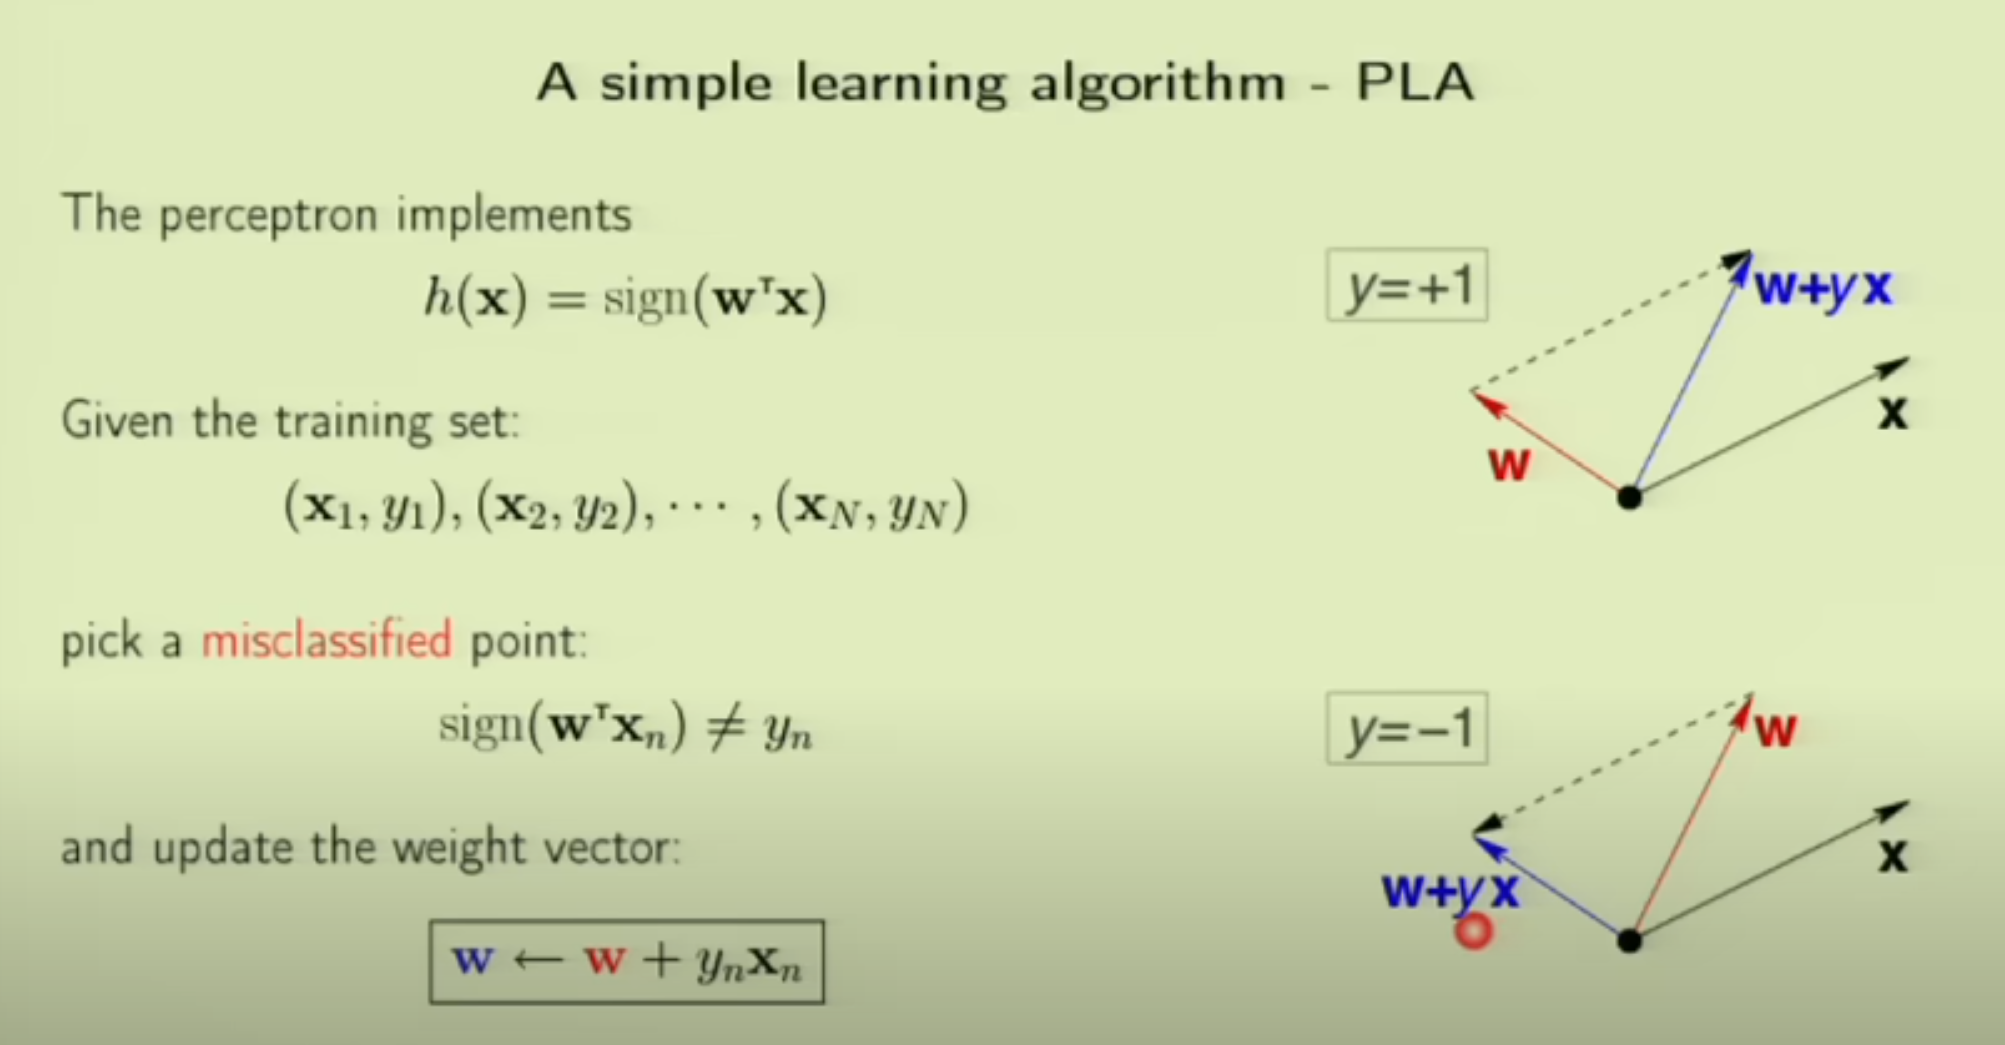

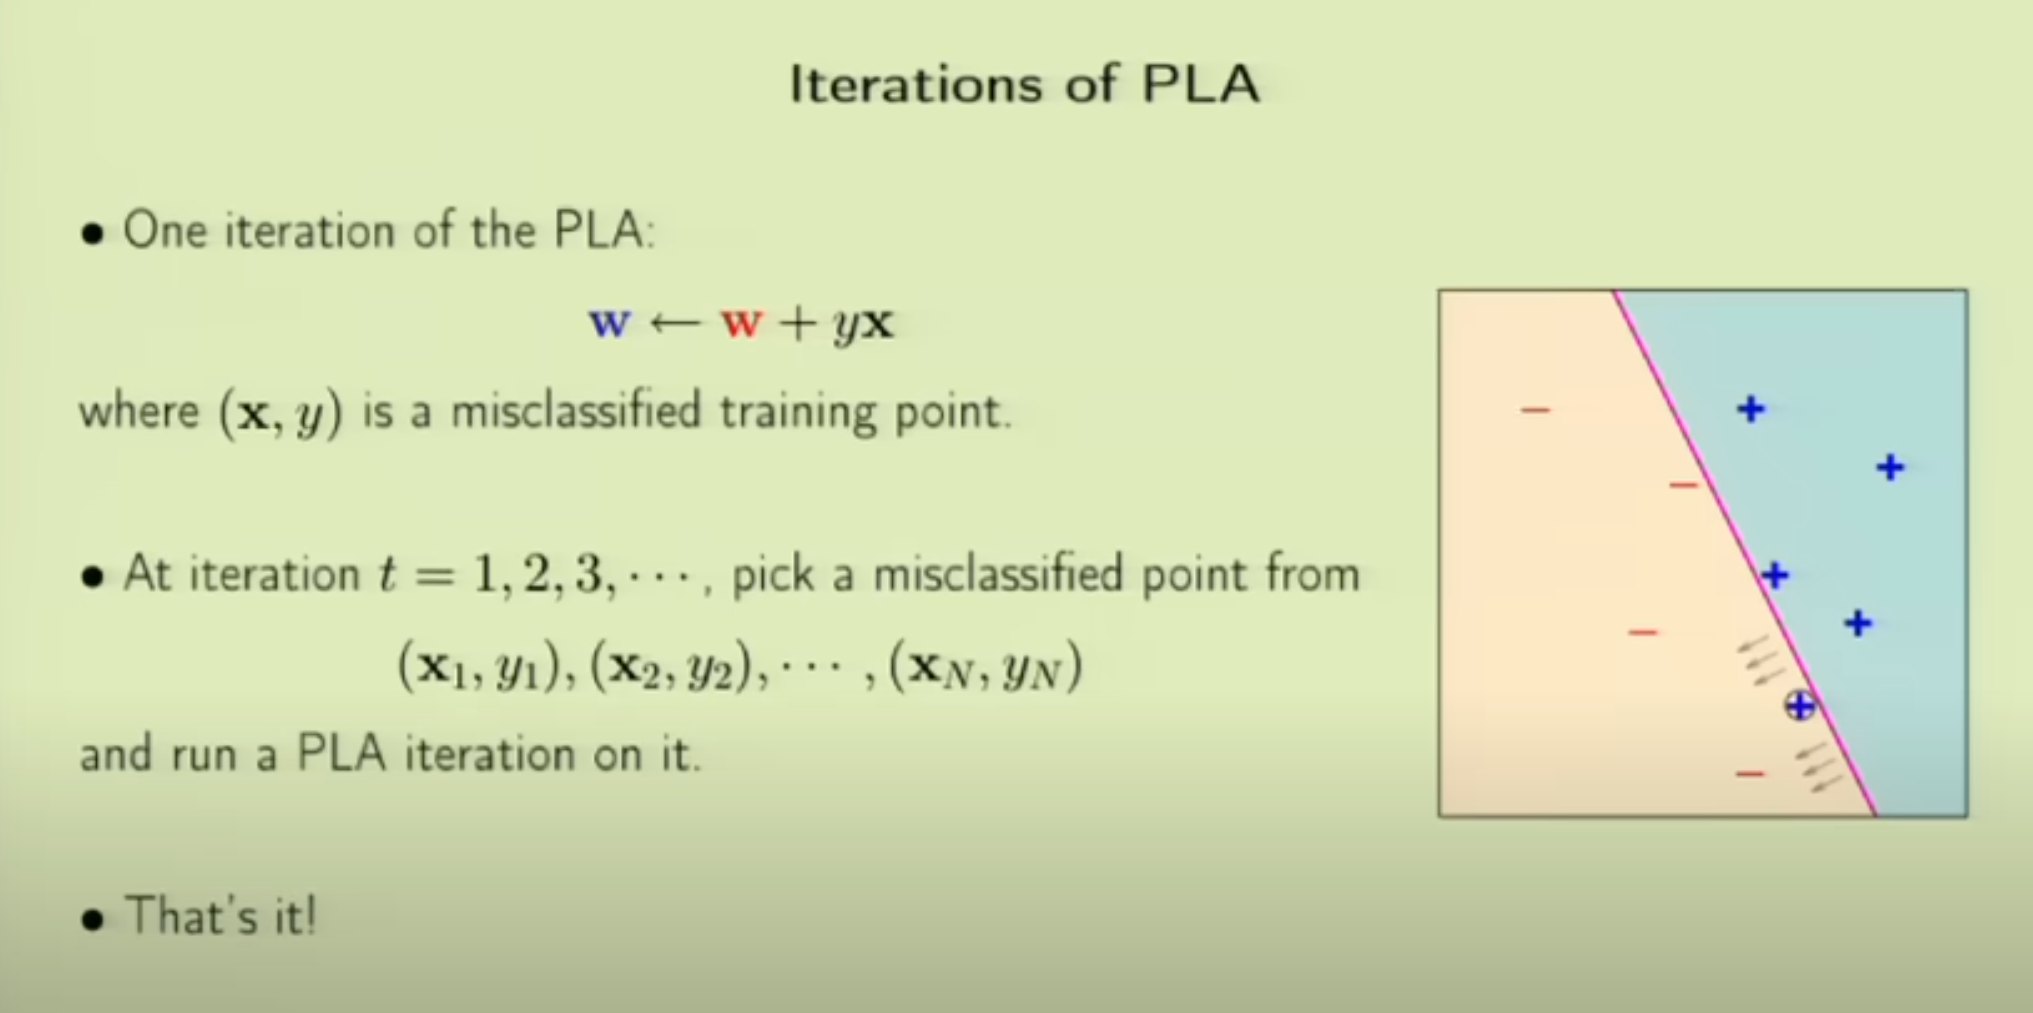

Initialize weights to 0

In [98]:
def run_pla(n, exp_iterations, verbose=False):

    def pla(x, w):
        assert x.shape == (n,3)
        assert w.shape == (3,)
        
        return np.sign(x @ w)
    
    def idx_of_misclassified_point(y_pred, y):
        assert len(y_pred) == len(y)
        for idx,(p1,p2) in enumerate(zip(y_pred, y)):
            if p1 != p2:
                return idx
    
    # Count PLA iterations, take average
    pla_iterations = []
    
    for exp_iteration in range(exp_iterations):
        # Pick a new target function f
        p1 = Point(*np.random.uniform(-1, 1, size=2))
        p2 = Point(*np.random.uniform(-1, 1, size=2))
        m = (p2.y - p1.y) / (p2.x - p1.x)
        b = p1.y - m * p1.x
    
        def classify_point(x, y):
            fxy = y - m * x - b
            return 1 if fxy > 0 else -1
        
        # Pick N random training points
        x_train = np.random.uniform(-1, 1, size=(n, 2))
        # Augment with constant (instead of using a bias)
        x_train = np.hstack([x_train, np.ones((n, 1))])
        assert x_train.shape == (n, 3)
        y_train = [classify_point(p[0], p[1]) for p in x_train]
                    
        # Initialize weights (+integrated bias) at zero
        w = np.zeros(3)
        
        for pla_iteration in range(100000):
            y_pred = pla(x_train, w)
            
            if (y_pred == y_train).all():
                if verbose:
                    print(f"Convergence after {pla_iteration} iterations!")
                pla_iterations.append(pla_iteration)
                break
            else:
                # Pick a single misclassified point
                mis = idx_of_misclassified_point(y_pred, y_train)
                if verbose:
                    print(f"Found misclassified point: {mis}")
                # Update weights based on that point
                if verbose:
                    print(f"Updating original weights: {w}")
                w = w + y_train[mis] * x_train[mis]
                if verbose:
                    print(f"New weights: {w}")
    
    return np.array(pla_iterations).mean()

run_pla(n=10, exp_iterations=1000, verbose=False)

12.169

So we're closest to 15 iterations on average.

My answer: <font color='green'>b</font>

# 8.
After each PLA convergence, I'll need to estimate the probability that g(x) != f(x) by generating a sufficiently large number of random points to check.

What's a sufficiently large number?

I guess it's time for Hoeffding's Inequality 😻

Let's start with the simple part of adjusting `run_pla()` to return an estimated error probability based on a configurable number of random points per experiment run: 



In [149]:
def estimate_pla_error(n, exp_iterations, n_random_points, verbose=False):

    def pla(x, w):
        assert x.shape[1] == 3
        assert w.shape == (3,)
        
        return np.sign(x @ w)
    
    def idx_of_misclassified_point(y_pred, y):
        assert len(y_pred) == len(y)
        for idx,(p1,p2) in enumerate(zip(y_pred, y)):
            if p1 != p2:
                return idx

    estimated_err_probs = []
    
    for exp_iteration in range(exp_iterations):
        # Pick a new target function f
        p1 = Point(*np.random.uniform(-1, 1, size=2))
        p2 = Point(*np.random.uniform(-1, 1, size=2))
        m = (p2.y - p1.y) / (p2.x - p1.x)
        b = p1.y - m * p1.x
    
        def classify_point(x, y):
            fxy = y - m * x - b
            return 1 if fxy > 0 else -1
        
        # Pick N random training points
        x_train = np.random.uniform(-1, 1, size=(n, 2))
        # Augment with constant (instead of using a bias)
        x_train = np.hstack([x_train, np.ones((n, 1))])
        assert x_train.shape == (n, 3)
        y_train = [classify_point(p[0], p[1]) for p in x_train]
                    
        # Initialize weights (+integrated bias) at zero
        w = np.zeros(3)
        
        for pla_iteration in range(100000):
            y_pred = pla(x_train, w)
            
            if (y_pred == y_train).all():
                if verbose:
                    print(f"Convergence after {pla_iteration} iterations!")
                break
            else:
                # Pick a single misclassified point
                mis = idx_of_misclassified_point(y_pred, y_train)
                if verbose:
                    print(f"Found misclassified point: {mis}")
                # Update weights based on that point
                if verbose:
                    print(f"Updating original weights: {w}")
                w = w + y_train[mis] * x_train[mis]
                if verbose:
                    print(f"New weights: {w}")

        # Estimate error probability of converged g
        error_sampling_points = np.random.uniform(-1, 1, size=(n_random_points, 2))
        error_sampling_points_with_bias = np.hstack([error_sampling_points, np.ones((n_random_points, 1))])
        y_pred_error_sample = pla(error_sampling_points_with_bias, w)
        y_error_sample = [classify_point(x, y) for (x, y) in error_sampling_points]
        estimated_err_prob = sum(0 if y_pred == y else 1 for y_pred, y in zip(y_pred_error_sample, y_error_sample)) / len(y_error_sample)
        estimated_err_probs.append(estimated_err_prob)
        
    
    return np.array(estimated_err_probs).mean()

Now back to the question of how many `n_random_points` we need.

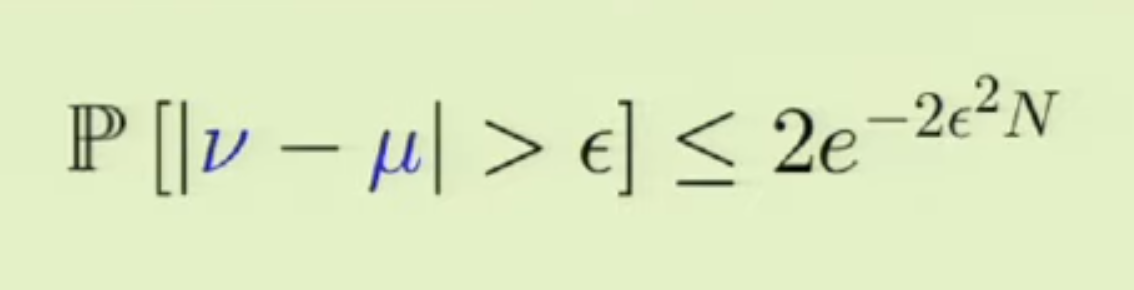

The smallest "gap" to differentiate is between [a]0.001 and [b]0.01 which is 0.009, taking half of that as ε: 0.0045 should be enough to distinguish correctly between all five probability candidates.

Let's say we really want a high confidence interval of 99.9%, or δ=0.001.

Rewriting the Hoeffding Inequality:

P(|ν - μ| > ε) = δ <= 2 exp(-2 * N * ϵ²)

N_Total >= ln(2/δ)/(2*ϵ²)



And then `n_random_points` will be N_Total / `exp_iterations` since we can add up all these probabilities I think 🤔


In [148]:
delta = 0.001
epsilon = 0.0045
n_total_bound = math.log(2/delta)/(2*(epsilon**2))
n_total_bound

187676.6039393107

In [151]:
exp_iterations = 1000
n_random_points = n_total_bound/exp_iterations
print(n_random_points)

187.6766039393107


So we take 188 points per experiment and should be safe.

In [152]:
estimate_pla_error(n=10, exp_iterations=exp_iterations, n_random_points=188, verbose=False)

0.11051063829787233

My answer: <font color='green'>c</font>

# 9.

In [107]:
run_pla(n=100, exp_iterations=10000, verbose=False)

273.46869373874773

This is somewhat ambiguous between [b] and [c] but seems closer to [b] after even 10,000 iterations.

My answer: <font color='green'>b</font>

# 10.
Epsilon and Delta remain the same, so our 188 points per experiment bound should also remain the same.

In [154]:
estimate_pla_error(n=100, exp_iterations=1000, n_random_points=188, verbose=False)

0.013627659574468085

So increasing the number of training points by a factor of 10 reduced the error probabilty by a factor of 10 as well. Makes sense.


My answer: <font color='green'>b</font>